In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/workspace/deep_birth_death/src/')

In [3]:
import pickle
import itertools
import time
import os
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from evaluation.classification import generate_class_results_calibrate_model, get_classification_results, plot_conf_mat

# Results generation

In [36]:
pickle_path = '/workspace/deep_birth_death/deep_learning/pickles/testing_k/'
res_path = "/workspace/deep_birth_death/deep_learning/models/testing_k_sims/class/"
n_tips = ['489']
for i in n_tips:
    with open(pickle_path + "dataset_" + i + "_10k.pkl", 'rb') as f:
        data = pickle.load(f)
        
    print(data["y_class_test"].shape)

(7000, 6)


In [5]:
pickle_path = '/workspace/deep_birth_death/deep_learning/pickles/testing_k/'
res_path = "/workspace/deep_birth_death/deep_learning/models/testing_k_sims/class/"

n_tips = ['674', '489', '87']

n_trees_tested = 6000
results_calibrated_model = dict()

for i in n_tips:
    with open(pickle_path + "dataset_" + i + "_10k.pkl", 'rb') as f:
        data = pickle.load(f)

    results_calibrated_model[i] = dict()
        
    model_path = res_path + i + "_classification_"

    print('---', i, 'tips ---')
    
    
    results_calibrated_model[i] = generate_class_results_calibrate_model(model_path, data['X_test'][:n_trees_tested],
                                        data['y_class_test'][:n_trees_tested])
    

--- 674 tips ---
nan


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- 489 tips ---
nan


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- 87 tips ---
0.9990003


In [6]:
for i in n_tips:
    print(str(results_calibrated_model[i]["temperature"]))
    
    with open("/workspace/deep_birth_death/deep_learning/temperatures/temperatures_testing_k/temperature_" + i +".txt", "w") as archivo:
        archivo.write(str(results_calibrated_model[i]["temperature"]))

nan
nan
0.9990003


# Results summary

In [8]:
get_classification_results(results_calibrated_model)

,674,489,87
accuracy,0.130667,0.142,0.778833
F1-Score,0.038522,0.041448,0.776415
Recall,0.166667,0.166667,0.777678
Precision,0.021778,0.023667,0.77869
Number of params,53110,14006,11446
Train time,358.134779,282.857288,1600.730229


# Results summary calibrated model

In [9]:
get_classification_results(results_calibrated_model)

,674,489,87
accuracy,0.130667,0.142,0.778833
F1-Score,0.038522,0.041448,0.776415
Recall,0.166667,0.166667,0.777678
Precision,0.021778,0.023667,0.77869
Number of params,53110,14006,11446
Train time,358.134779,282.857288,1600.730229


In [10]:
results_calibrated_model["87"]["temperature"]

0.9990003

# Confusion Matrices

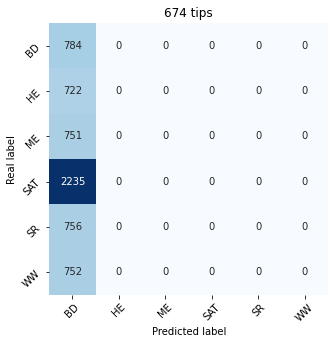

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.1307    1.0000    0.2311       784
           1     0.0000    0.0000    0.0000       722
           2     0.0000    0.0000    0.0000       751
           3     0.0000    0.0000    0.0000      2235
           4     0.0000    0.0000    0.0000       756
           5     0.0000    0.0000    0.0000       752

    accuracy                         0.1307      6000
   macro avg     0.0218    0.1667    0.0385      6000
weighted avg     0.0171    0.1307    0.0302      6000



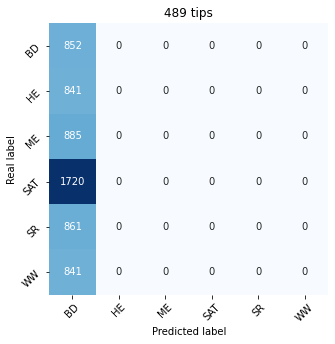

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.1420    1.0000    0.2487       852
           1     0.0000    0.0000    0.0000       841
           2     0.0000    0.0000    0.0000       885
           3     0.0000    0.0000    0.0000      1720
           4     0.0000    0.0000    0.0000       861
           5     0.0000    0.0000    0.0000       841

    accuracy                         0.1420      6000
   macro avg     0.0237    0.1667    0.0414      6000
weighted avg     0.0202    0.1420    0.0353      6000



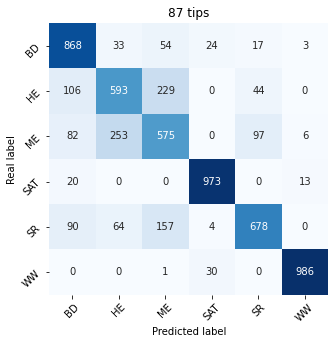

              precision    recall  f1-score   support

           0     0.7444    0.8689    0.8018       999
           1     0.6288    0.6101    0.6193       972
           2     0.5659    0.5676    0.5668      1013
           3     0.9437    0.9672    0.9553      1006
           4     0.8110    0.6828    0.7414       993
           5     0.9782    0.9695    0.9738      1017

    accuracy                         0.7788      6000
   macro avg     0.7787    0.7777    0.7764      6000
weighted avg     0.7796    0.7788    0.7775      6000



In [12]:
label_names = ["BD", "HE", "ME", "SAT", "SR", "WW"]
for i in results_calibrated_model:
    plot_conf_mat((results_calibrated_model[i]["y_pred"]), (results_calibrated_model[i]["y_test"]), label_names, i)

# Train History

In [6]:
def train_plot(ax, i, metric):
    ax.plot(results[i]['history'][metric],
            linestyle='-', label='Train', color='blue', linewidth=.7)
    ax.plot(results[i]['history']['val_' + metric],
            linestyle='--', label='Validation', color='blue', linewidth=.7)
    

    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_title(i)

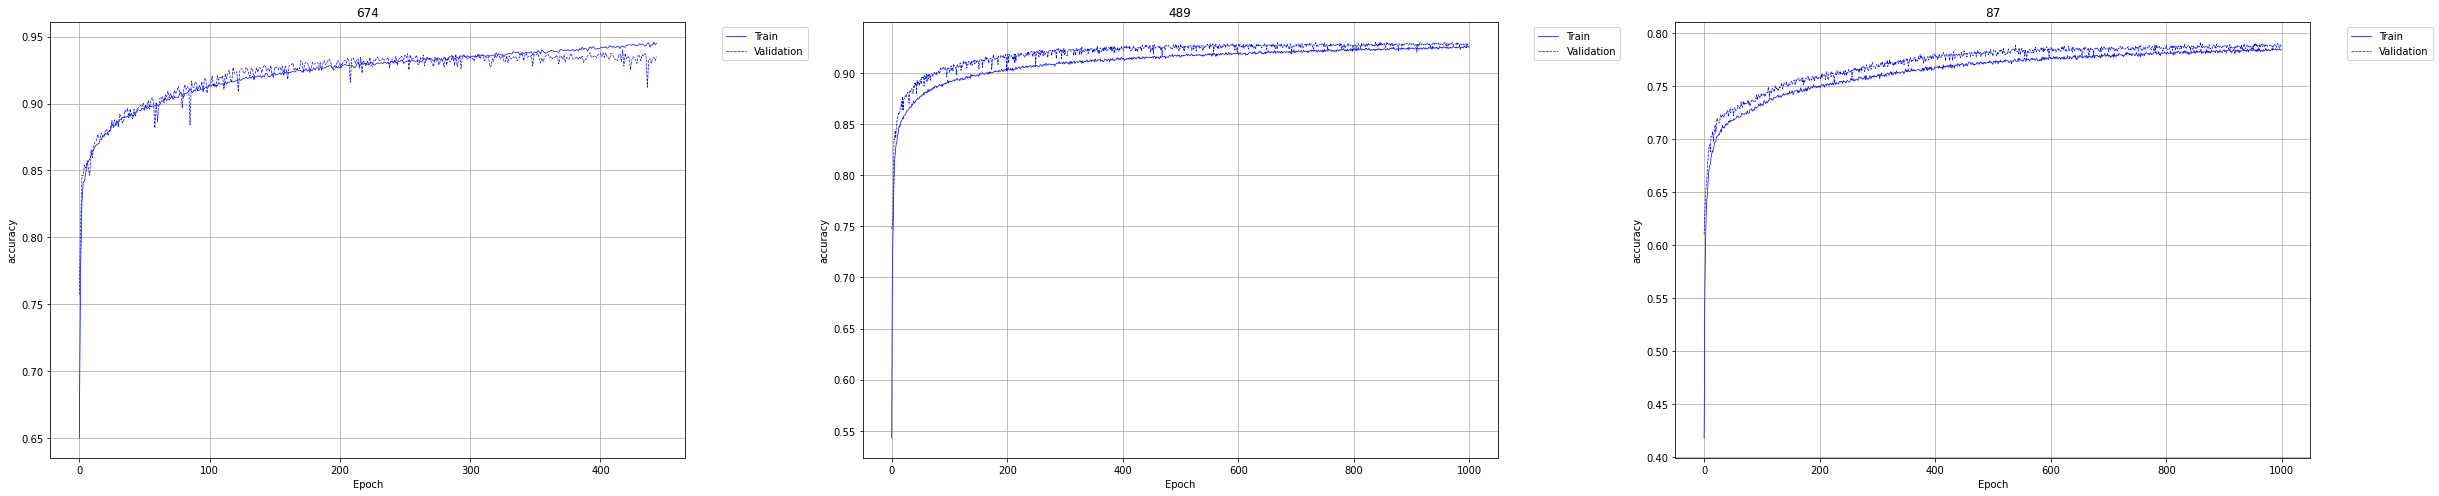

In [7]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'accuracy')
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

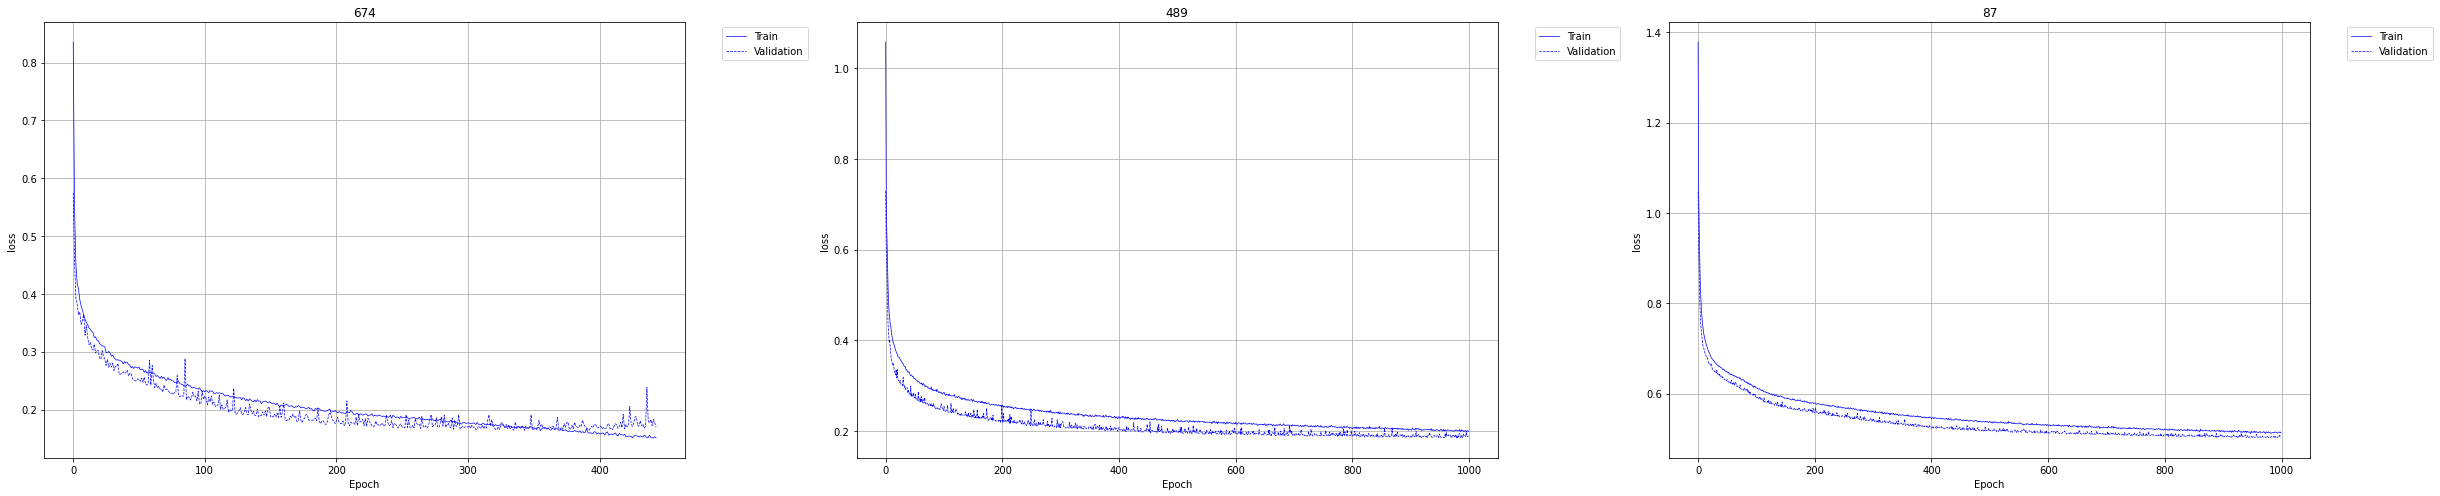

In [8]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'loss')
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Results stratified

<AxesSubplot:xlabel='N_tips'>

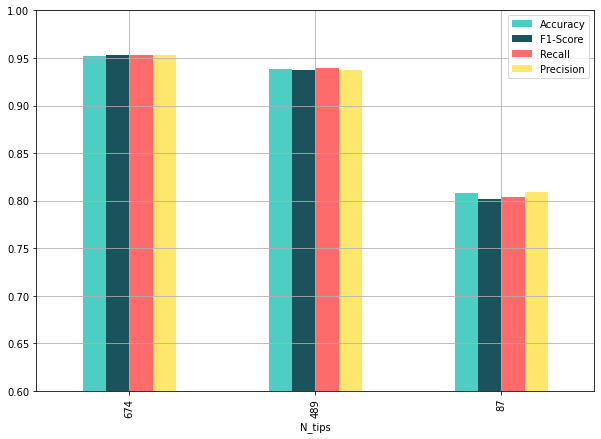

In [9]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Accuracy': [results[i]['accuracy'] for i in n_tips],
    'F1-Score': [results[i]['f1-score'] for i in n_tips],
    'Recall': [results[i]['recall'] for i in n_tips],
    'Precision': [results[i]['precision'] for i in n_tips],
})

df.plot(x="N_tips", y=["Accuracy", "F1-Score", "Recall", "Precision"], kind="bar",
        color=['#4ECDC4','#1A535C','#FF6B6B','#FFE66D'], figsize=(10,7),
        ylim=(0.6, 1), grid=True)

### Number of Params

<AxesSubplot:xlabel='N_tips'>

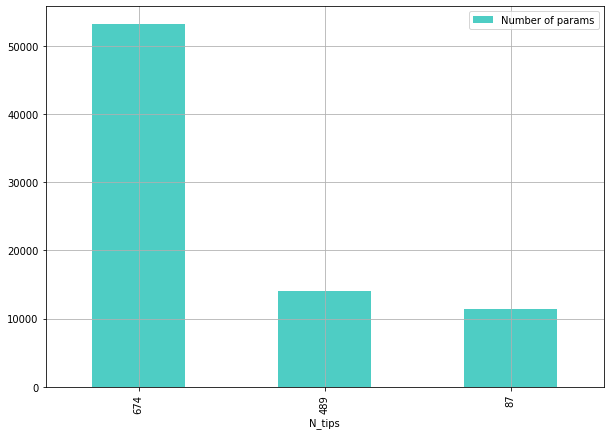

In [10]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Number of params': [results[i]['n_params'] for i in n_tips],
})

df.plot(x="N_tips", y=["Number of params"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)

### Training time

<AxesSubplot:xlabel='N_tips'>

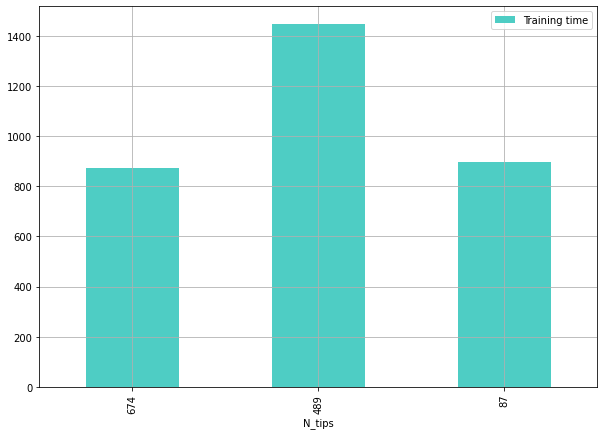

In [11]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Training time': [results[i]['train_time'] for i in n_tips],
})

df.plot(x="N_tips", y=["Training time"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)